In [1]:
using Distributions
using Copulas
using Random
using StatsPlots
default(fmt=:png)

function plot_XY(copula; n=10^6)
    mvdist = SklarDist(copula, (Normal(), Normal()))
    X, Y = eachrow(rand(mvdist, n))
    @show cor(X, Y)
    t = 1:min(n, 10^4)
    P1 = scatter(X[t], Y[t]; label="", ms=1.5, msc=:auto, alpha=0.3)
    plot!(xguide="X", yguide="Y")
    P2 = stephist(X; label="X", norm=true)
    plot!(Normal(); label="standard normal", ls=:dash)
    P3 = stephist(Y; label="Y", norm=true)
    plot!(Normal(); label="standard normal", ls=:dash)
    P4 = stephist(X+Y; label="X+Y", norm=true)
    plot!(fit(Normal, X+Y); label="normal", ls=:dash)
    plot(P1, P3, P2, P4; layout=(2, 2), size=(800, 800))
end

plot_XY (generic function with 1 method)

cor(X, Y) = 0.5722967564989689


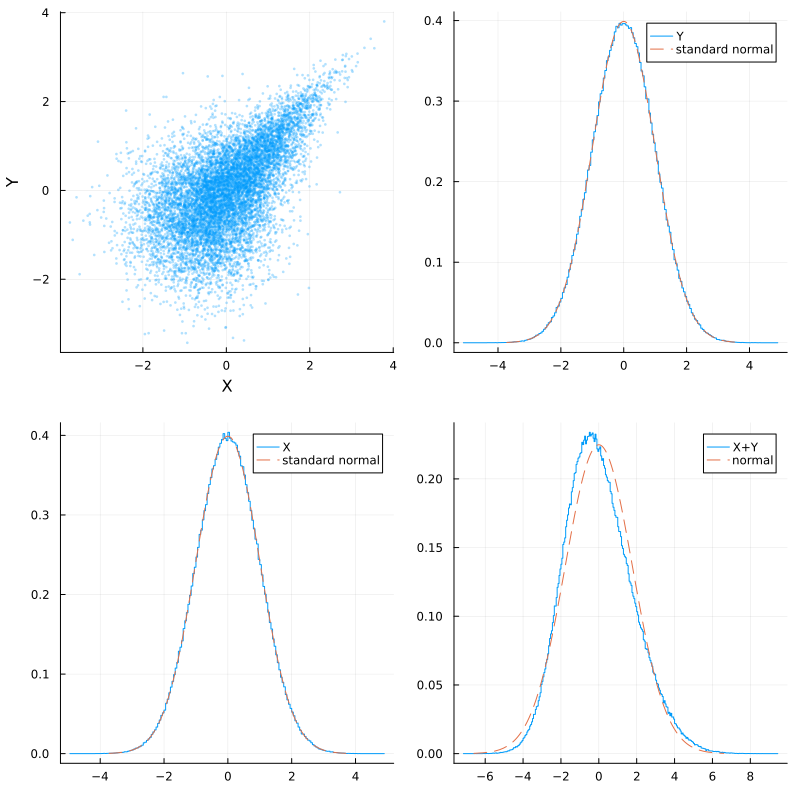

In [2]:
plot_XY(JoeCopula(2, 2.2))

cor(X, Y) = 0.0006639490346806817


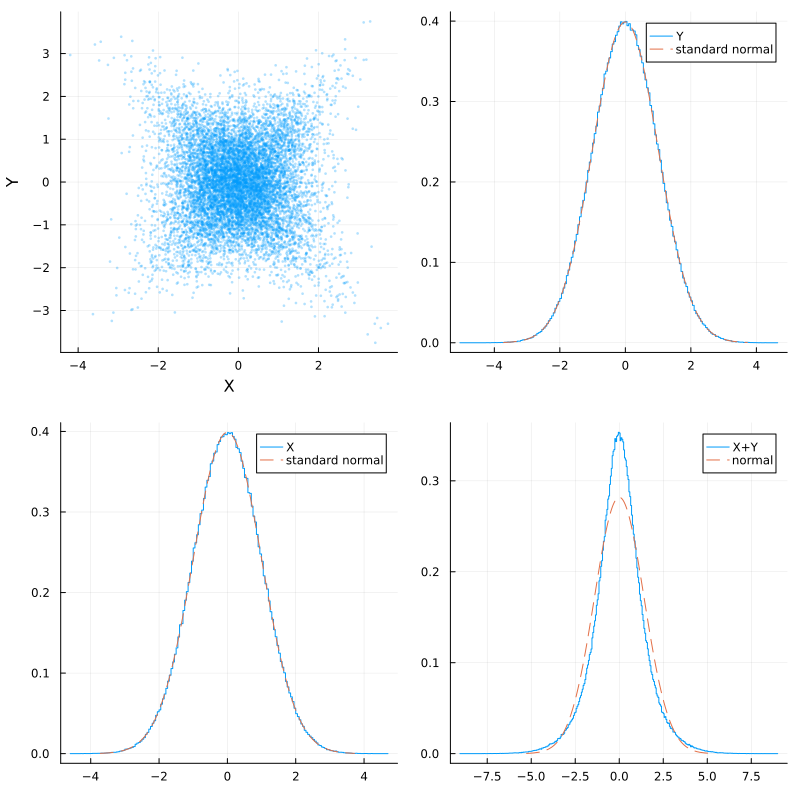

In [3]:
plot_XY(TCopula(2, [1 0; 0 1]))

cor(X, Y) = 0.7747205971121348


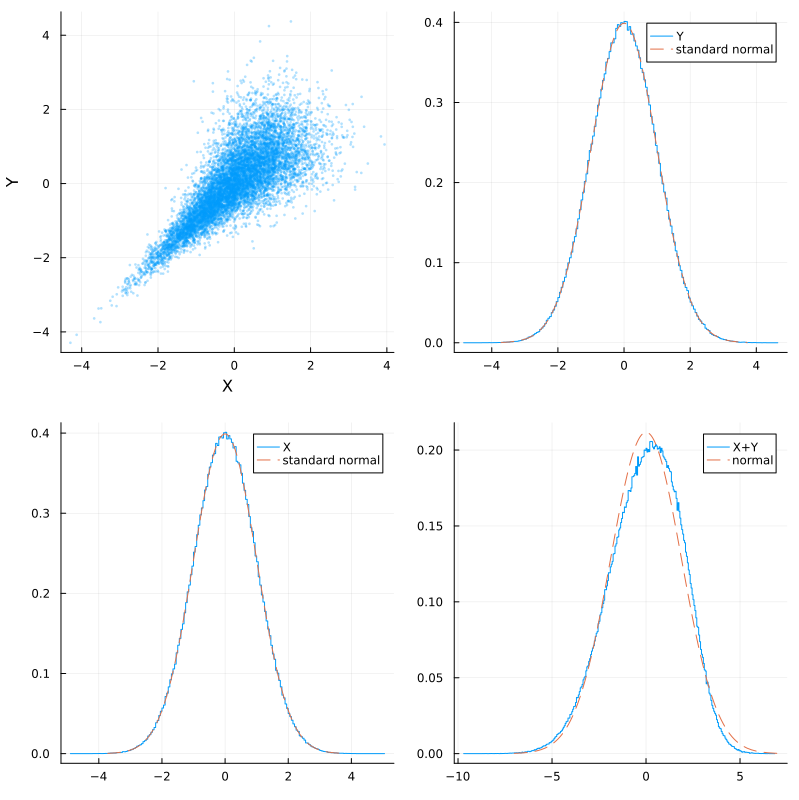

In [4]:
plot_XY(ClaytonCopula(2, 3.0))